# Exploring Trends in the NSDUH Data Set

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import thinkstats2 as ts
import thinkplot

For this project, I'm exploring 11 years of NSDUH data to look for trends in oxycodone use.

The survey series can be found on the [SAMHDA website](https://www.datafiles.samhsa.gov/study-series/national-survey-drug-use-and-health-nsduh-nid13517).

The codebooks can be found by clicking through the [NSDUH page on SAMHDA](https://www.datafiles.samhsa.gov/study-series/national-survey-drug-use-and-health-nsduh-nid13517)

The terms of use for this data can be found on the [SAMHDA website](https://www.datafiles.samhsa.gov/info/terms-use-nid3422)

In [80]:
def add_year_column(year, df):
    """Add a column 'year' to a dataframe for identification purposes.
    
    Args:
        year (int): The year value of the column.
        df (pandas dataframe): The dataframe to add the column to.
    """
    year_arr = np.ones(df.shape[0], dtype=np.int16) * year
    year_col = pd.Series(year_arr, df.index)
    df['year'] = year_col

In [81]:
# Load the data. Each survey year is stored as its own key in the hdf file.
# See import_data.py for information on how the data was saved.
nsduh2007 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2007')
nsduh2008 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2008')
nsduh2009 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2009')
nsduh2010 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2010')
nsduh2011 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2011')
nsduh2012 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2012')
nsduh2013 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2013')
nsduh2014 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2014')
nsduh2015 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2015')
nsduh2016 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2016')
nsduh2017 = pd.read_hdf('nsduh.hdf5', 'NSDUH_2017')

nsduh_all_years = [nsduh2007,
                   nsduh2008,
                   nsduh2009,
                   nsduh2010,
                   nsduh2011,
                   nsduh2012,
                   nsduh2013,
                   nsduh2014,
                   nsduh2015,
                   nsduh2016,
                   nsduh2017]

for year, df in zip(range(2007, 2018), nsduh_all_years):
    add_year_column(year, df)

In [82]:
nsduh2008['year'][0]

2008

## Perscription Opiods
The most common opiods incvolved in perscription overdose death are Metadone, Oxycodone, and Hydrocodone [according to the CDC](https://www.cdc.gov/drugoverdose/opioids/prescribed.html). I'm going to specifically look at oxycontin because the NSDUH survey provides the most questions targetted at its use as a painkiller.

### Prepare the data

In [87]:
df = nsduh2007[['oxycage', 'oxycmfu']]
df.head()

,oxycage,oxycmfu
0,48,15
1,48,15
2,48,15
3,48,15
4,48,15


For years 2007 to 2014, the questions pertaining to oxycontin use are:

* 'oxycage': age when first used oxy nonmedically
* 'oxycrec': time since last used oxy nonmediacally
* 'oxyyrtot': total number of days used oxy in last 12 months
* 'oxdaypyr': total number of days used oxy nonmedically in last 12 months

For years 2015 to 2017, the questions pertaining to oxycontin use are:

* 'oxcnnmage': used oxy in not directed by doctor in last 12 months

First, I want to make a dataframe containing these categories for all years. Then, I'll go back and clean it up.

In [197]:
opioids = []
for nsduh in nsduh_all_years:
    if nsduh['year'][0] < 2015:
        columns = ['oxycage', 'oxycrec', 'oxyyrtot', 'oxdaypyr', 'year']
        opioids.append(nsduh.dropna(subset=columns)[columns])
    else:
        columns = ['oxcnnmage', 'year']
        opioids.append(nsduh.dropna(subset=columns)[columns])
opioids[0].head()
opioid_df = pd.concat(opioids, sort=True)
opioid_df.head()

,oxcnnmage,oxdaypyr,oxycage,oxycrec,oxyyrtot,year
0,NaN,31.0,48.0,7.0,75.0,2007
1,NaN,31.0,48.0,7.0,75.0,2007
2,NaN,31.0,48.0,7.0,75.0,2007
3,NaN,31.0,48.0,7.0,75.0,2007
4,NaN,31.0,48.0,7.0,75.0,2007


In [198]:
def clean_opioid_df(df):
    """Replace unwanted data codes with NaNs.
    Args:
        df (pandas data frame): A dataframe containing nsduh opioid data.
    """
    df['oxcnnmage'].replace([991, 993, 994, 997, 998], np.nan)
    df['oxycage'].replace([981, 985, 991, 994, 997, 998], np.nan)
    df['oxycrec'].replace([97, 98], np.nan)
    df['oxyyrtot'].replace([981, 985, 994, 997, 998], np.nan)
    df['oxyyrtot'].replace([981, 991, 993], 0)
    df['oxdaypyr'].replace([985, 989, 994, 997, 998, 999], np.nan)
    df['oxdaypyr'].replace([981, 991, 993], 0)
    
clean_opioid_df(opioid_df)    

Let's look at the variables.

In [199]:
for col in opioid_df.columns:
    print(opioid_df[col].describe(), '\n')

count    170319.000000
mean         45.848496
std           4.161621
min           0.000000
25%          42.000000
50%          48.000000
75%          48.000000
max          52.000000
Name: oxcnnmage, dtype: float64 

count    446802.000000
mean         32.862548
std           6.173941
min           0.000000
25%          28.000000
50%          32.000000
75%          37.000000
max          48.000000
Name: oxdaypyr, dtype: float64 

count    446802.000000
mean         49.081560
std           6.996077
min           0.000000
25%          49.000000
50%          50.000000
75%          51.000000
max          57.000000
Name: oxycage, dtype: float64 

count    446802.000000
mean          6.887626
std           1.168496
min           0.000000
25%           7.000000
50%           7.000000
75%           7.000000
max          10.000000
Name: oxycrec, dtype: float64 

count    446802.000000
mean         73.199059
std           9.219310
min           0.000000
25%          68.000000
50%          73.00

### Age when first tried oxycontin nonmedically

I'm interested in looking at when people typically try oxycontin nonmedically for the first time. The plots below are only representative of the people who had tried oxycontin in their lives.

#### Survey years 2007 to 2014

Text(0, 0.5, 'Count')

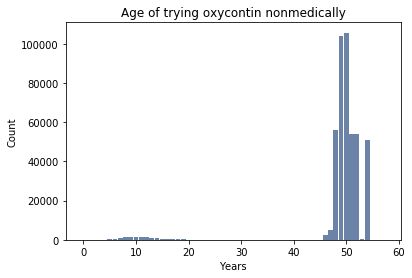

In [104]:
hist_age = ts.Hist(opioid_df['oxycage'])
thinkplot.hist(hist_age)
plt.title("Age of trying oxycontin (surveys 2007 - 2014)")
plt.xlabel("Years")
plt.ylabel("Count")

It looks like the majority of people are middle aged when they try oxycontin nonmedically. I'm not surprised by this fact, based on the age I expect people to be when they are perscribed painkillers for injuries. It's interesting that there is a small section of the histogram centered around 10 years. I'm surprised to see this. My guess would be that the people who tried it when they were extremely young were given it by their parents. I'm less surprised to see some people trying it in their teens, but I might have expected the count to be higher for this age group.

Let's look at the PMF and CDF of the same information.

Text(0, 0.5, 'PMF')

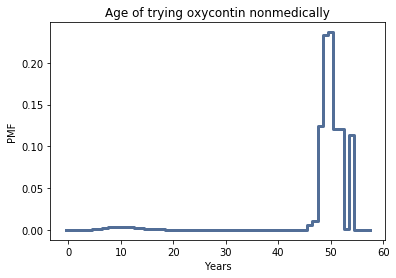

In [175]:
pmf_age = ts.Pmf(opioid_df['oxycage'])
thinkplot.Pmf(pmf_agcdf_age = ts.Cdf(opioid_df['oxycage'])
thinkplot.Cdf(cdf_age)
plt.title("Age of trying oxycontin nonmedically")
plt.xlabel("Years")e)
plt.title("Age of trying oxycontin nonmedically")
plt.xlabel("Years")
plt.ylabel("PMF")

Text(0, 0.5, 'PMF')

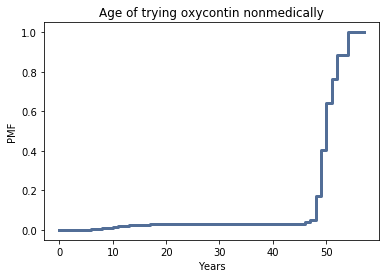

In [174]:
cdf_age = ts.Cdf(opioid_df['oxycage'])
thinkplot.Cdf(cdf_age)
plt.title("Age of trying oxycontin nonmedically")
plt.xlabel("Years")
plt.ylabel("PMF")

These plots confirm what I saw in the histogram. Someone who is over 50 is much more likely to have tried oxycontin nonmedically than younger people.

#### Survey years 2015 to 2017

Let's take a look at the more recent surveys.

Text(0.5, 0, 'year')

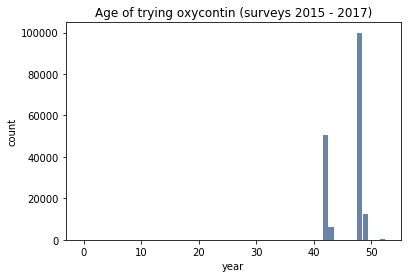

In [113]:
hist_age = ts.Hist(opioid_df['oxcnnmage'])
thinkplot.hist(hist_age)
plt.title("Age of trying oxycontin (surveys 2015 - 2017)")
plt.ylabel('count')
plt.xlabel('year')

Text(0.5, 0, 'year')

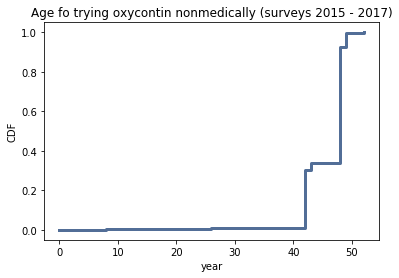

In [114]:
cdf_age = ts.Cdf(opioid_df['oxcnnmage'])
thinkplot.cdf(cdf_age)
plt.title("Age of trying oxycontin nonmedically (surveys 2015 - 2017)")
plt.ylabel("CDF")
plt.xlabel("year")

This data, although much more sparse, seems to follow the same trends as the data from the older surveys. It looks like we're going to have to combine these columns in order to see the full picture.

#### All survey years

In the 2007 through 2014 surveys, the 'oxycage' category contains the answers to the question *"How long has it been since you last used OxyContin that was not prescribed for you or that you took only for the experience or feeling it caused?"*

In the 2015 through 2017 surveys, the 'oxcnnmage' category contains the answers to the question *"How old were you when you first used OxyContin in a way a doctor did not direct you to use it?"*

I'm combining these answers into one column named 'agefirst' to get a fuller picture of the age at which respondants first tried oxycontin across all surveys.

In [203]:
opioid_df['agefirst'] = opioid_df.apply(lambda r: (r['oxycage'] if r['oxycage'] != np.nan else r['oxcnnmage']), axis=1)
opioid_df.head()

,oxcnnmage,oxdaypyr,oxycage,oxycrec,oxyyrtot,year,agefirst
0,NaN,31.0,48.0,7.0,75.0,2007,48.0
1,NaN,31.0,48.0,7.0,75.0,2007,48.0
2,NaN,31.0,48.0,7.0,75.0,2007,48.0
3,NaN,31.0,48.0,7.0,75.0,2007,48.0
4,NaN,31.0,48.0,7.0,75.0,2007,48.0


Text(0.5, 0, 'age (years)')

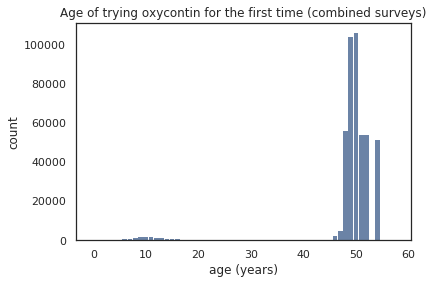

In [204]:
hist_age = ts.Hist(opioid_df['agefirst'])
thinkplot.hist(hist_age)
plt.title('Age of trying oxycontin for the first time (combined surveys)')
plt.ylabel('count')
plt.xlabel('age (years)')

Median age: 50.0 IQR: 2.0


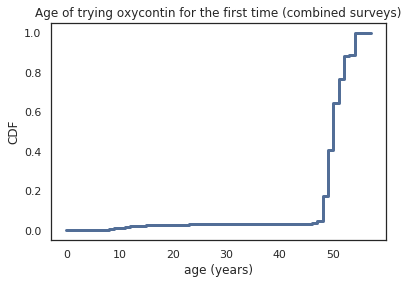

In [209]:
cdf_age = ts.Cdf(opioid_df['agefirst'])
thinkplot.cdf(cdf_age)
plt.title('Age of trying oxycontin for the first time (combined surveys)')
plt.ylabel('CDF')
plt.xlabel('age (years)')

print("Median age: {}".format(cdf_age.Value(0.5)), "IQR: {}".format(cdf_age.Value(.75) - cdf_age.Value(.25)))

This data looks fairly similar to the 2007-2014 data by itself, which is expected. It is surprising to see such a small IQR for this data. It appears that the survey respondants who tried oxycontin nonmedically the first time were very likely to be in their early 50s

### Frequency of using oxycontin nonmedically

I am also interested in the amount that survey respondants used oxycontin nonmedically. Let's look at the CDF of both the number of days respondants used oxycontin in the last 12 months and the histogram of the last time since they used oxycontin nonmedically. Please note that only the surveys from 2007-2014 include this question.

,oxcnnmage,oxdaypyr,oxycage,oxycrec,oxyyrtot,year,agefirst
51,NaN,32.0,14.0,2.0,76.0,2007,14.0
63,NaN,32.0,12.0,2.0,76.0,2007,12.0
103,NaN,32.0,12.0,2.0,76.0,2007,12.0
212,NaN,32.0,19.0,2.0,76.0,2007,19.0
213,NaN,3.0,13.0,1.0,3.0,2007,13.0


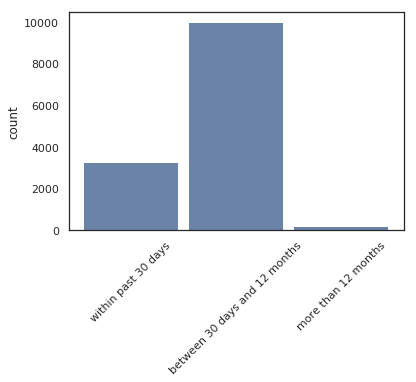

In [211]:
valid = opioid_df[(opioid_df['oxycrec'] == 1) | (opioid_df['oxycrec'] == 2) | (opioid_df['oxycrec'] == 3)]
time_since_hist = ts.Hist(valid['oxycrec'])
thinkplot.hist(time_since_hist)
plt.ylabel('count')
ticks = [1, 2, 3]
labels = ['within past 30 days', 'between 30 days and 12 months', 'more than 12 months']
plt.xticks(ticks, labels, rotation=45)
valid.head()

Note that earlier I replaced the codes for 'NEVER USED OXYCONTIN' and 'DID NOT USE OXYCONTIN IN THE PAST 12 MONTHS' for column 'oxyyrtot' with 0s.

(711, 10)

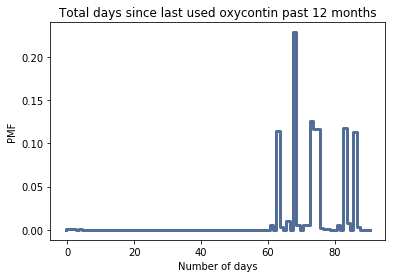

In [181]:
pmf_days_used = ts.Pmf(opioid_df['oxyyrtot'])
thinkplot.pmf(pmf_days_used)
plt.xlabel('Number of days')
plt.ylabel('PMF')
plt.title('Total days since last used oxycontin past 12 months')
opioid_df[opioid_df['oxyyrtot'] == 0].shape

Text(0.5, 1.0, 'Total days used oxycontin past 12 months')

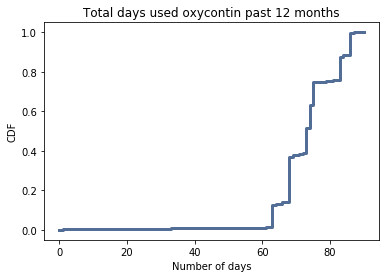

In [180]:
cdf_days_used = ts.Cdf(opioid_df['oxyyrtot'])
thinkplot.cdf(cdf_days_used)
plt.xlabel('Number of days')
plt.ylabel('CDF')
plt.title('Total days used oxycontin past 12 months')

I'm surprised by what I see here. I would have expected to see a lot of respondants reporting that they did not use oxycontin at all in the past year, or only a few times, but instead there is a large spike in frequency after 60 days. This data was for the number of days of any oxycontin use though. Let's see what the pmf and cdf of only nonmedical oxycontin use look like.

Text(0.5, 1.0, 'Total days since last used oxycontin nonmedically past 12 months')

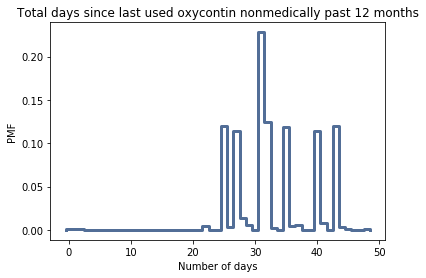

In [185]:
pmf_days_used = ts.Pmf(opioid_df['oxdaypyr'])
thinkplot.pmf(pmf_days_used)
plt.xlabel('Number of days')
plt.ylabel('PMF')
plt.title('Total days since last used oxycontin nonmedically past 12 months')

Text(0.5, 1.0, 'Total days used oxycontin nonmedically past 12 months')

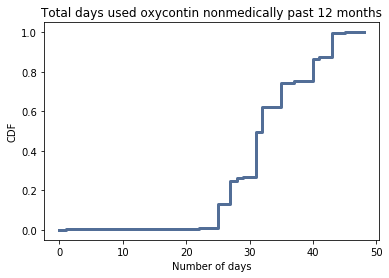

In [186]:
cdf_days_used = ts.Cdf(opioid_df['oxdaypyr'])
thinkplot.cdf(cdf_days_used)
plt.xlabel('Number of days')
plt.ylabel('CDF')
plt.title('Total days used oxycontin nonmedically past 12 months')

### Frequency of nonmedical oxycontin use by year

I also want to investigate if there is any relationship between the survey year and the number of days people reported using opioids in the past year nonmedically.

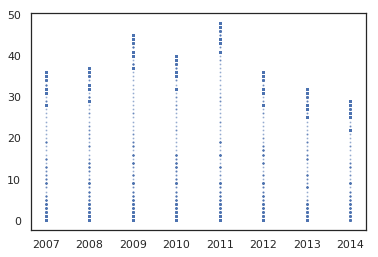

In [193]:
subset = opioid_df.dropna(subset=['oxdaypyr'])
plt.plot(subset['year'], subset['oxdaypyr'], 'o', markersize=1, alpha=0.4)

The data is quantized by year, so it looks a little strange, but it's interesting to note that there appear to be more dense clusters around lower numbers of days and higher numbers of days in each year. I think a violin plot might be a better representation of this data.

Text(0.5, 1.0, 'Total number of days in past 12 months used oxycontin nonmedically')

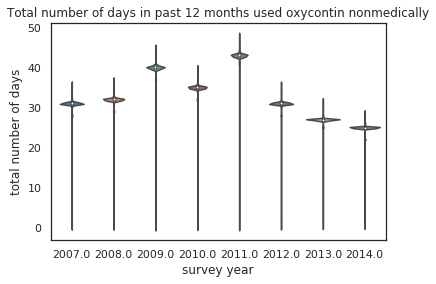

In [212]:
sns.violinplot(x='year', y='oxdaypyr', data=subset, whis=10)
plt.xlabel('survey year')
plt.ylabel('total number of days')
plt.title('Total number of days in past 12 months used oxycontin nonmedically')

It appears from these reprentations of the data that people tend to misuse oxycontin nonmedically for a large number of days. I would have expected to see some people report larger numbers of days than 50.